# Quiz-MA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/shreyasiitr/57f8fa30fa20b049359fb567cc6407d0/raw/20bd9bf2069e4a25790fbd17ea82828dad038291/AirQualityUCI.csv"

df = pd.read_csv(url)

df.head(5)

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 140355
Shape of the data frame is (9357, 15)
No of Rows =  9357
No of Columns =  15


,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


 - Handling Missing values

In [3]:
df.isna().sum()

Date      0
Time      0
CO        0
PT08S1    0
NMHC      0
C6H6      0
PT08S2    0
NOx       0
PT08S3    0
NO2       0
PT08S4    0
PT08S5    0
T         0
RH        0
AH        0
dtype: int64

In [4]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


No missing entries.

# Quick EDA

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (9357, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0


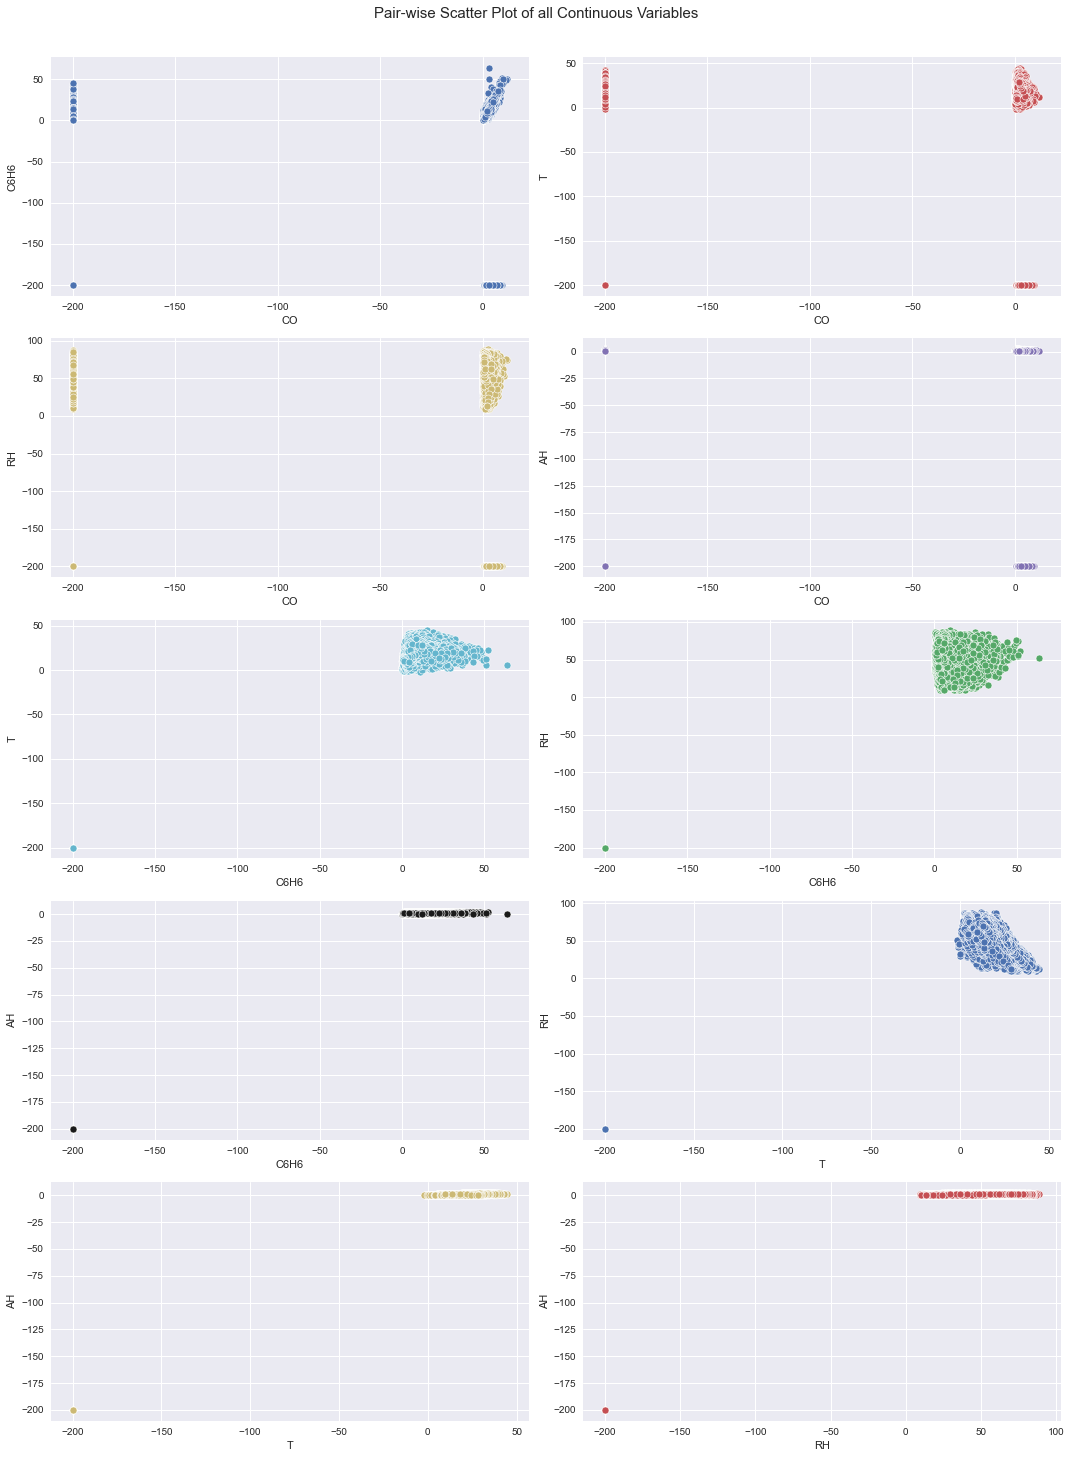

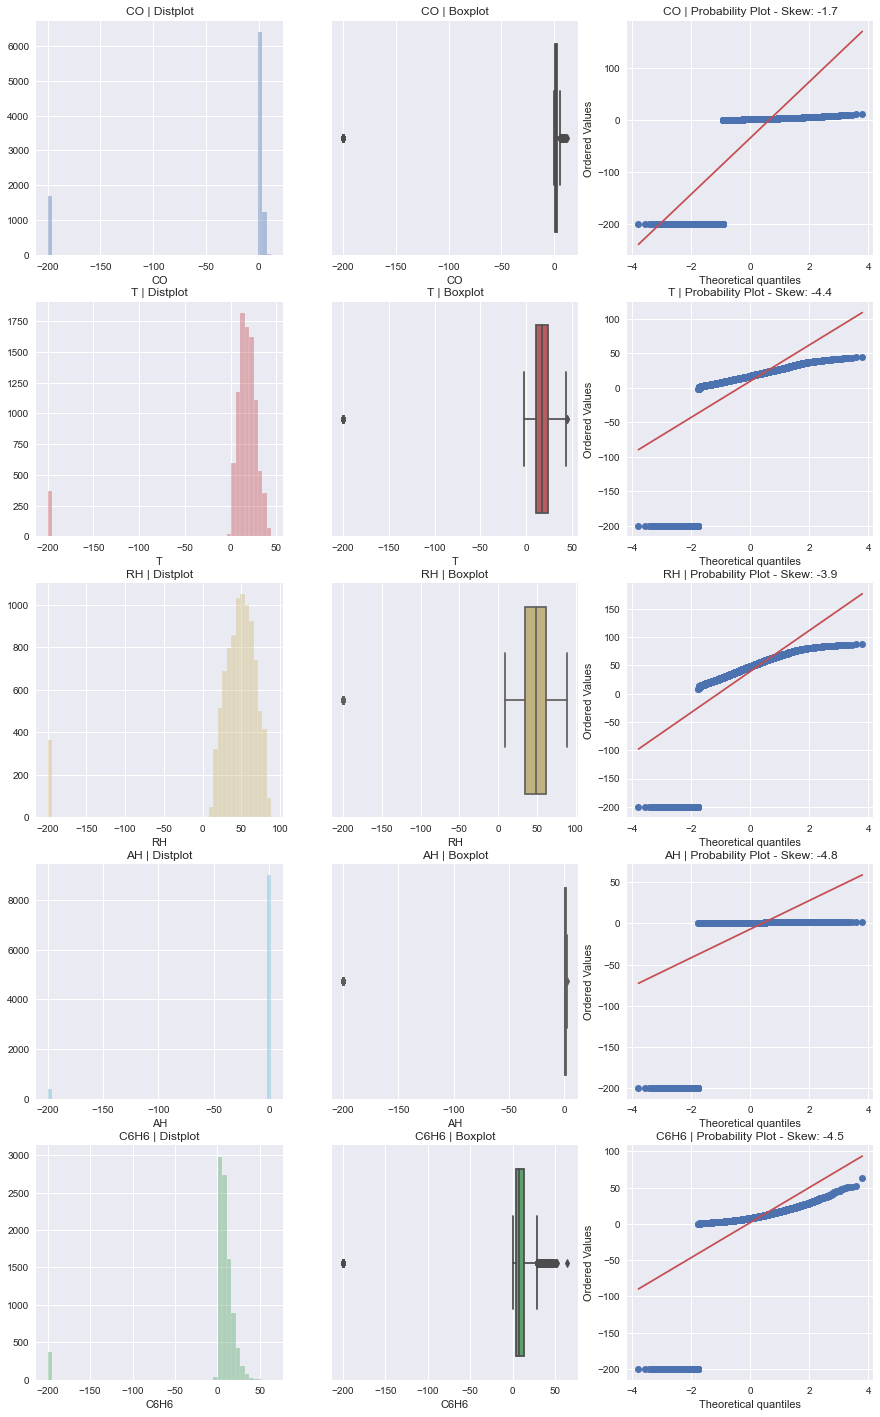

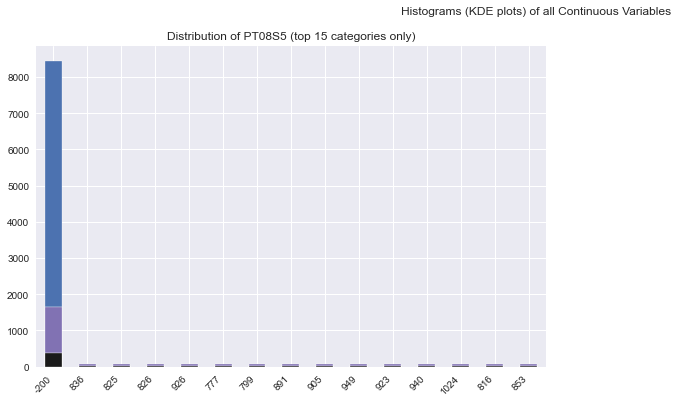

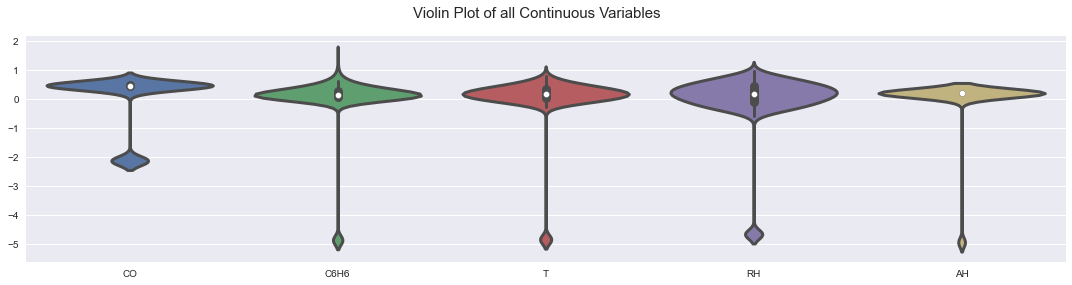

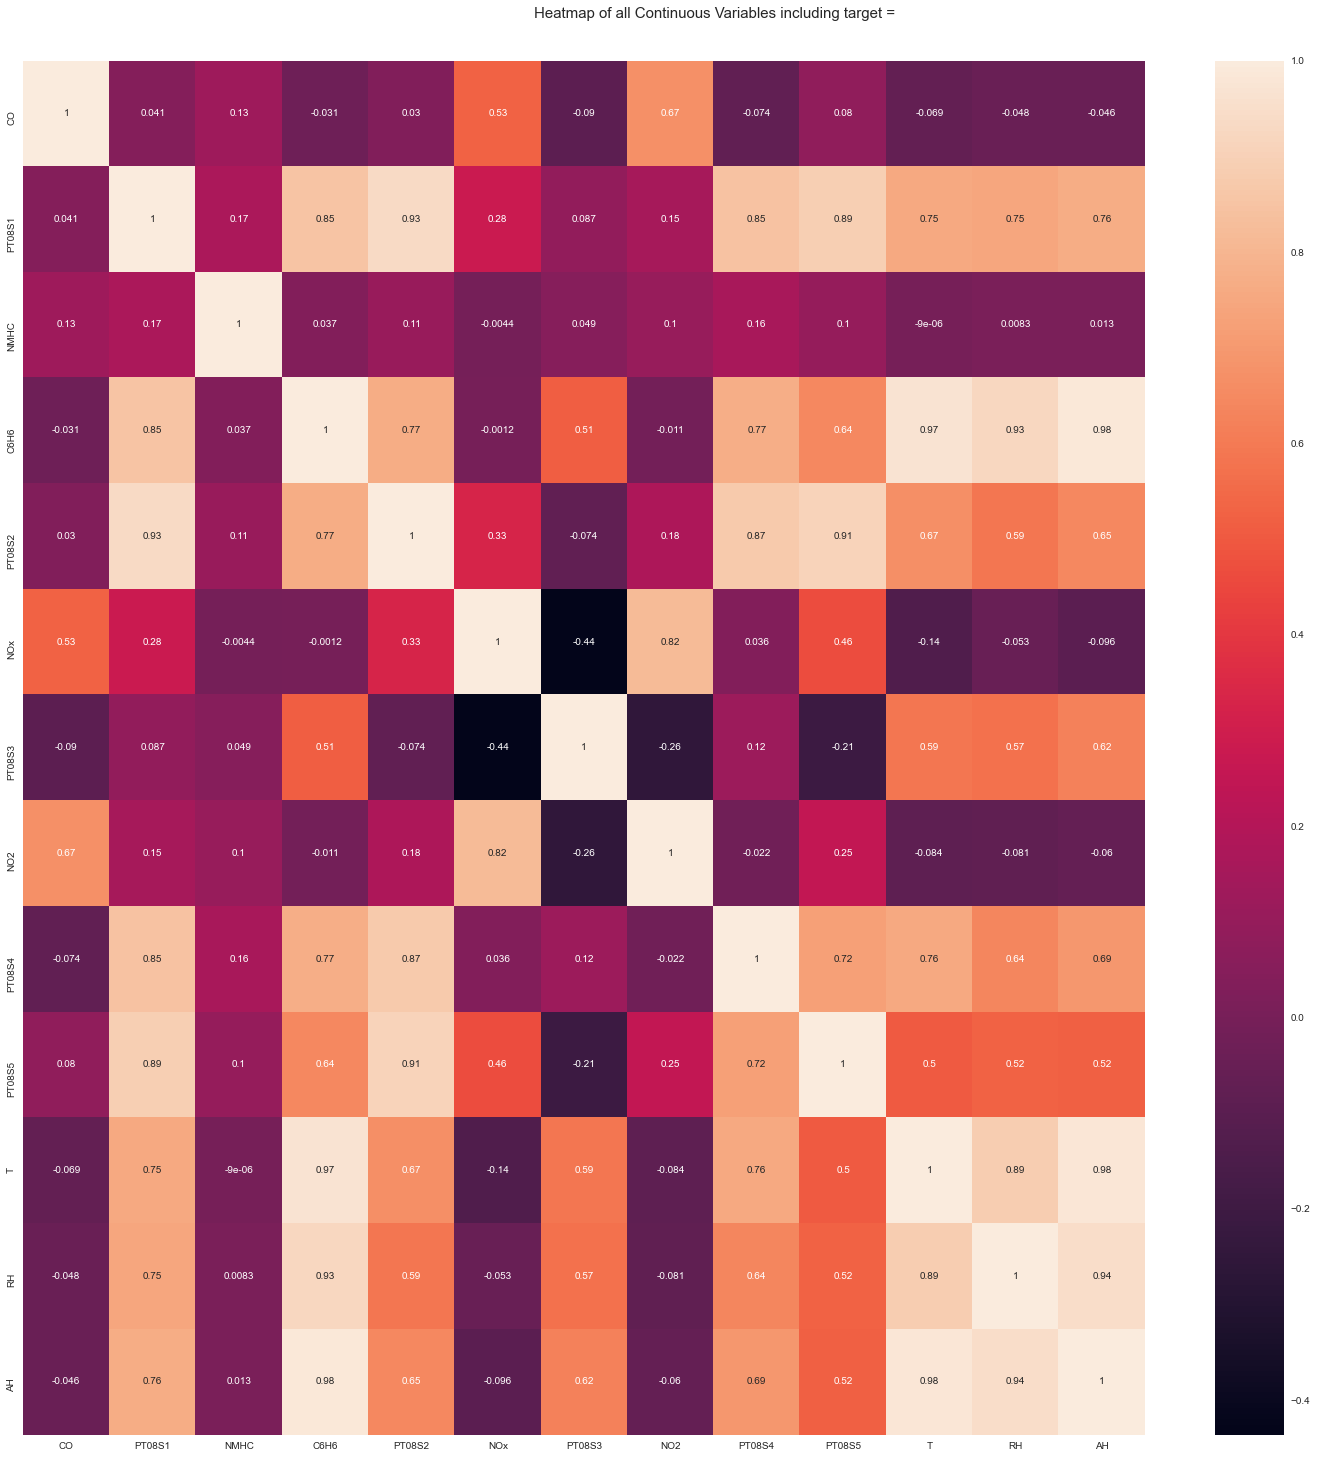

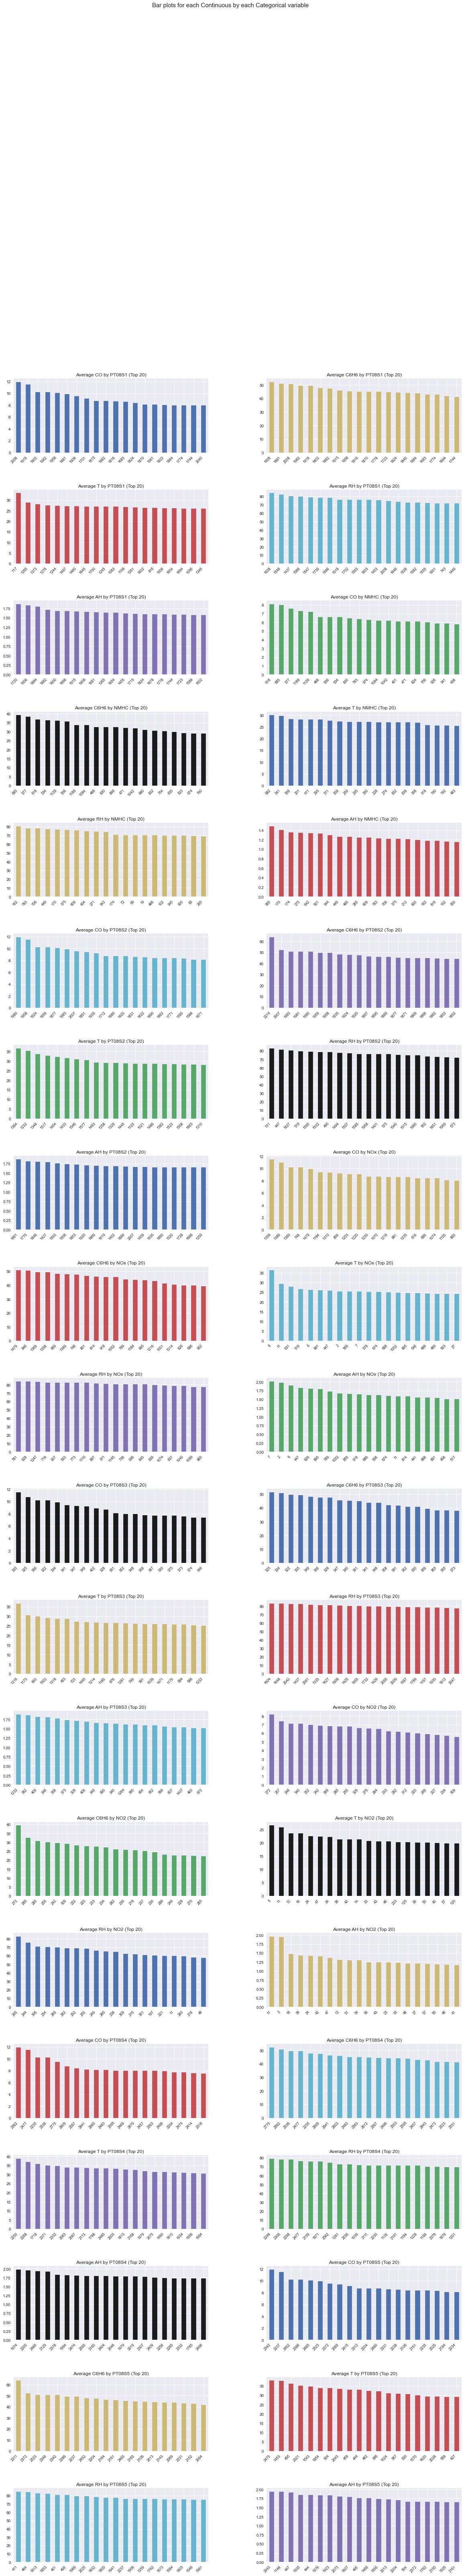

Time to run AutoViz (in seconds) = 66.800

 ###################### VISUALIZATION Completed ########################


In [5]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

# Analysis

In [6]:
df_T = pd.DataFrame(df.iloc[:,-3])
df_B = pd.DataFrame(df.iloc[:,-3])
df_T.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


## Simple Moving Average (SMA)

In [7]:
df_T['SMA_3'] = df_B.iloc[:,0].rolling(window=3).mean()
df_T

,T,SMA_3
0,13.6,NaN
1,13.3,NaN
2,11.9,12.933333
3,11.0,12.066667
4,11.2,11.366667
...,...,...
9352,21.9,17.866667
9353,24.3,21.466667
9354,26.9,24.366667
9355,28.3,26.500000


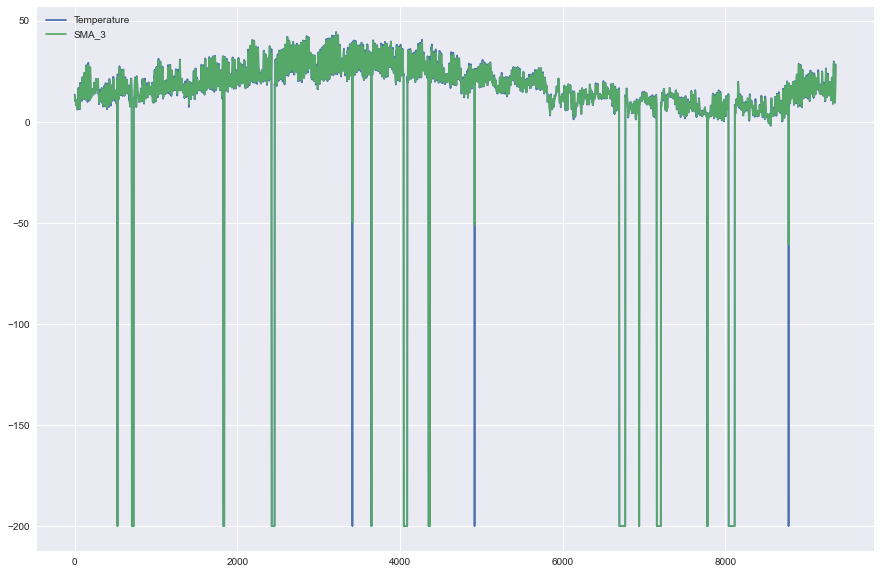

In [8]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_T['T'], label = 'Temperature')
plt.plot(df_T['SMA_3'], label = 'SMA_3')

plt.legend(loc = 2)
plt.show()

## Cumulative Average

In [9]:
df_T['CMA_4'] = df_B.expanding(min_periods=4).mean()
df_T.head(10)

,T,SMA_3,CMA_4
0,13.6,NaN,NaN
1,13.3,NaN,NaN
2,11.9,12.933333,NaN
3,11.0,12.066667,12.450000
4,11.2,11.366667,12.200000
5,11.2,11.133333,12.033333
6,11.3,11.233333,11.928571
7,10.7,11.066667,11.775000
8,10.7,10.900000,11.655556
9,10.3,10.566667,11.520000


In [10]:
import datetime

df['DateTime'] = (df.Date) + ' ' + (df.Time)
df['DateTime']

0       3/10/2004 18:00:00
1       3/10/2004 19:00:00
2       3/10/2004 20:00:00
3       3/10/2004 21:00:00
4       3/10/2004 22:00:00
               ...        
9352     4/4/2005 10:00:00
9353     4/4/2005 11:00:00
9354     4/4/2005 12:00:00
9355     4/4/2005 13:00:00
9356     4/4/2005 14:00:00
Name: DateTime, Length: 9357, dtype: object

In [11]:
df.DateTime = pd.to_datetime(df['DateTime'])
df.DateTime

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

 - change the index

In [12]:
df_T.index = df.DateTime
df_T.head()

,T,SMA_3,CMA_4
DateTime,,,
2004-03-10 18:00:00,13.6,NaN,NaN
2004-03-10 19:00:00,13.3,NaN,NaN
2004-03-10 20:00:00,11.9,12.933333,NaN
2004-03-10 21:00:00,11.0,12.066667,12.45
2004-03-10 22:00:00,11.2,11.366667,12.20


## Cumulative Moving Average wrt. time.

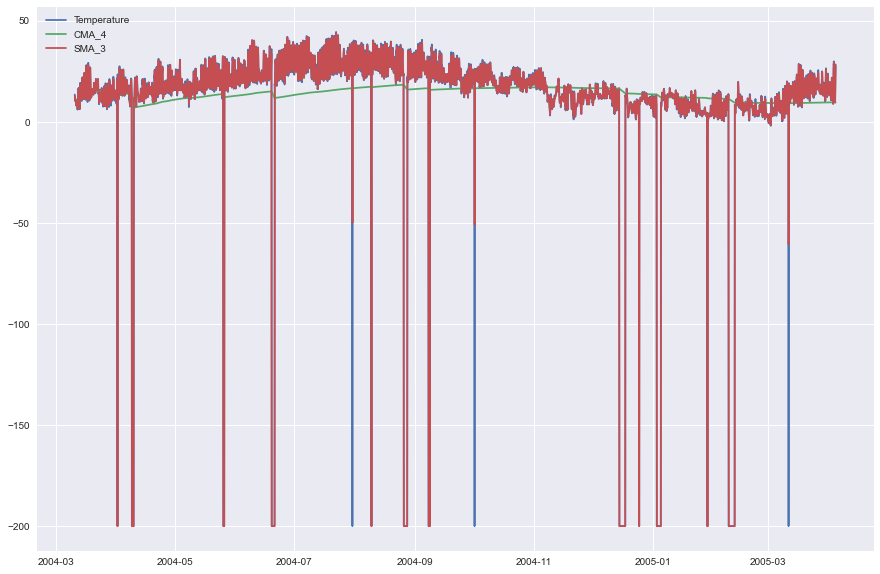

In [13]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(df_T['T'], label = 'Temperature')
plt.plot(df_T['CMA_4'], label = 'CMA_4')
plt.plot(df_T['SMA_3'], label = 'SMA_3')

plt.legend(loc = 2)
plt.show()

## Exponential Moving Average

In [14]:
#Exponential Moving Average
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40,adjust=False).mean()
df_T

,T,SMA_3,CMA_4,EMA
DateTime,,,,
2004-03-10 18:00:00,13.6,NaN,NaN,13.600000
2004-03-10 19:00:00,13.3,NaN,NaN,13.585366
2004-03-10 20:00:00,11.9,12.933333,NaN,13.503153
2004-03-10 21:00:00,11.0,12.066667,12.450000,13.381048
2004-03-10 22:00:00,11.2,11.366667,12.200000,13.274655
...,...,...,...,...
2005-04-04 10:00:00,21.9,17.866667,9.770940,16.366986
2005-04-04 11:00:00,24.3,21.466667,9.772493,16.753962
2005-04-04 12:00:00,26.9,24.366667,9.774324,17.248891


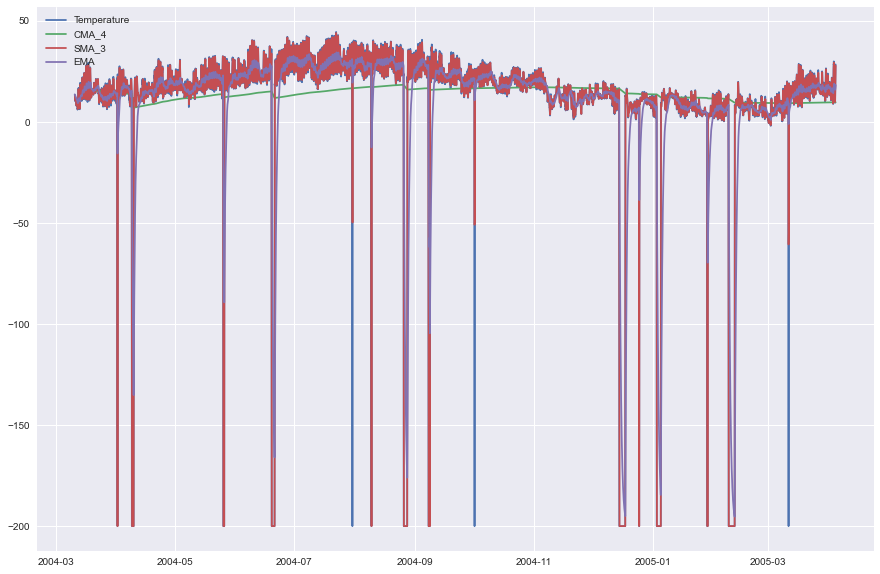

In [15]:
plt.figure(figsize=[15,10])
plt.grid(True)

plt.plot(df_T['T'],label='Temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.plot(df_T['SMA_3'], label = 'SMA_3')
plt.plot(df_T['EMA'],label='EMA')

plt.legend(loc=2)
plt.show()